In [4]:
# Neural networks-Gas_turbines.csv

In [5]:
import pandas as pd
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [6]:
from __future__ import absolute_import, division, print_function

In [7]:
gas=pd.read_csv(r"C:\Users\Satish\Downloads\gas_turbines.csv")

In [8]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [9]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [10]:
gas.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [11]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [12]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

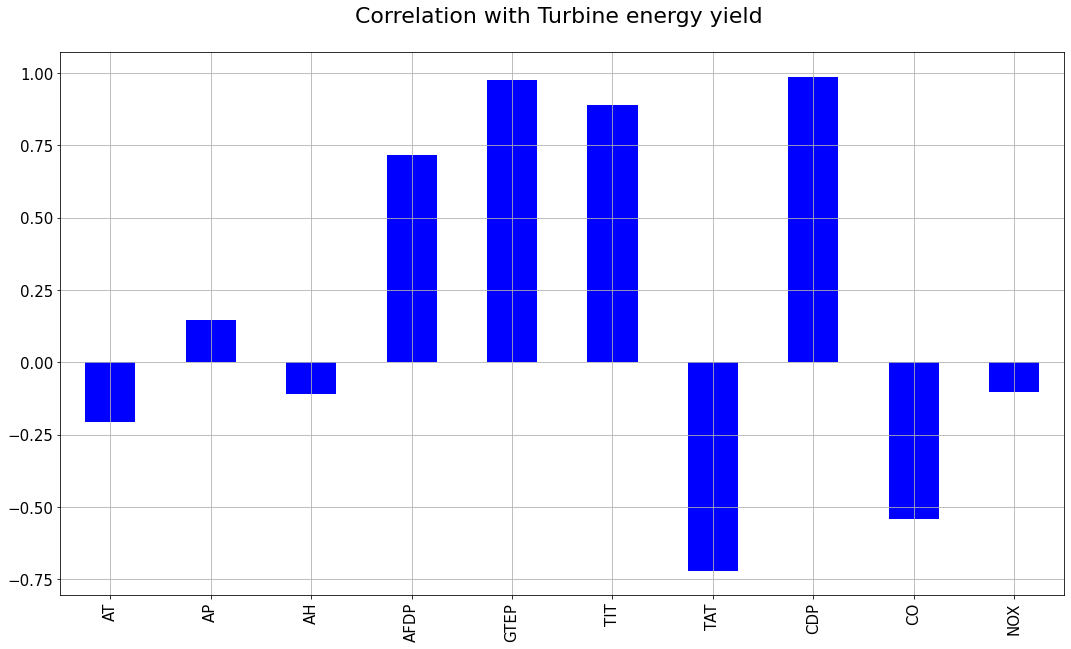

In [13]:
# correlation with TEY
data2 = gas.copy()

correlations = data2.corrwith(gas["TEY"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'b',
        rot = 90, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [14]:
#Pre-processing
#Split the data into train and test
train_data=gas.sample(frac=0.8,random_state=0)
test_data=gas.drop(train_data.index)

In [15]:
# Look overall statistics
train_stats=train_data.describe()
train_stats.pop('TEY')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
AT,12031.0,17.741588,7.587113,0.522300,11.38850,18.115,23.82300,34.9290
AP,12031.0,1013.238389,6.365782,986.160000,1009.00000,1012.800,1016.90000,1034.2000
AH,12031.0,79.134583,13.820613,30.344000,69.73100,82.395,90.02250,100.2000
AFDP,12031.0,4.197000,0.762093,2.087400,3.72080,4.184,4.54930,7.6106
GTEP,12031.0,25.396946,4.187552,17.878000,23.25450,25.052,27.10450,37.4020
TIT,12031.0,1083.658881,16.641844,1000.800000,1078.80000,1088.500,1095.90000,1100.6000
TAT,12031.0,545.382701,7.891120,512.450000,542.29000,549.890,550.05000,550.6100
CDP,12031.0,12.096597,1.106458,9.904400,11.59050,12.022,12.55550,15.0550
CO,12031.0,1.989508,2.279006,0.000388,0.85467,1.393,2.18485,44.1030
NOX,12031.0,68.251009,10.567500,27.765000,61.29200,66.648,74.04300,119.8900


In [16]:
# Split features from labels
train_labels=train_data.pop('TEY')
test_labels=test_data.pop('TEY')

In [17]:
# Normalize the data
def norm(x):
    return (x-train_stats['mean']) / train_stats['std']
normed_train_data=norm(train_data)
normed_test_data=norm(test_data)

In [18]:
# Build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae','mse','accuracy'])
    return model

In [19]:
model=build_model()

In [20]:
# Inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [21]:
example_batch = normed_train_data[:10]
example_result= model.predict(example_batch)
example_result

1/1 [==============================] - 0s 153ms/step


array([[ 0.10476148],
       [ 0.2394444 ],
       [-0.06929706],
       [-0.35816383],
       [-0.16591872],
       [-0.10338292],
       [-0.1158734 ],
       [ 0.16187961],
       [-0.09104344],
       [ 0.02718849]], dtype=float32)

In [22]:
# Train the model for 100 epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print('.', end='')
EPOCHS=100
history = model.fit(
 normed_train_data,train_labels,
 epochs=EPOCHS, validation_split = 0.2, verbose = 0,
 callbacks=[PrintDot()])


.

In [23]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
95,0.907285,0.723521,0.907285,0.0,0.833575,0.741897,0.833575,0.0,95
96,0.903650,0.719993,0.903650,0.0,1.119034,0.872932,1.119034,0.0,96
97,0.924468,0.717780,0.924468,0.0,0.820744,0.692278,0.820744,0.0,97
98,0.918771,0.730055,0.918771,0.0,0.623570,0.624788,0.623570,0.0,98
99,0.903386,0.710242,0.903386,0.0,0.629997,0.603796,0.629997,0.0,99


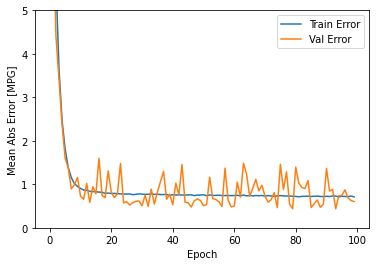

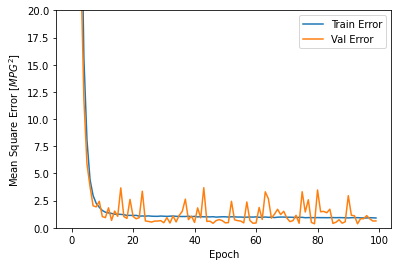

In [24]:
# Visualize the model's training progress
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'],hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,20])

plot_history(history)


.

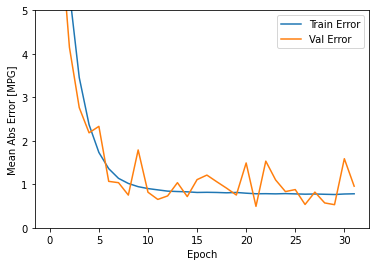

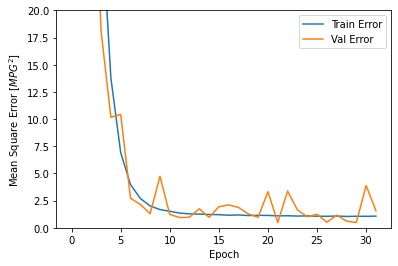

In [25]:
model = build_model()
# The patience parameter is the amount of epochs to check for improvement
early_stop= keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history=model.fit (normed_train_data,train_labels,epochs=EPOCHS,
                  validation_split = 0.2, verbose=0, callbacks=[early_stop,PrintDot()])
plot_history(history)

In [26]:
# let's see how well the model generalizes by using test set
d=model.evaluate(normed_test_data,test_labels,verbose=0)
print('Testing set Mean Abs Error: ',d[1]*100)

Testing set Mean Abs Error:  94.58597302436829


94/94 [==============================] - 0s 874us/step


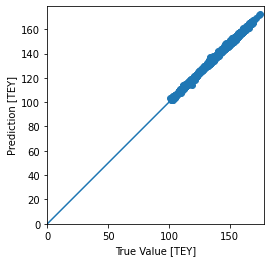

In [27]:
# fianlly, predict TEY values using data in the testing set:
test_prediction=model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_prediction)
plt.xlabel('True Value [TEY]')
plt.ylabel('Prediction [TEY]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

In [28]:
# Neural networks-fireforests.csv

In [29]:
# que 2

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [31]:
forest=pd.read_csv(r"C:\Users\Satish\Downloads\forestfires.csv")

In [32]:
forest.head(25)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [33]:
# EDA
forest.shape

(517, 31)

In [34]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [35]:
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [36]:
pd.set_option('display.max_columns', None)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [37]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [38]:
forest_1=forest[~forest.duplicated()]

In [39]:
forest_1.reset_index(inplace=True)

In [40]:
forest_1

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
505,513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
506,514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
507,515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [41]:
forest_1=forest_1.drop('index',axis=1)
forest_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:>

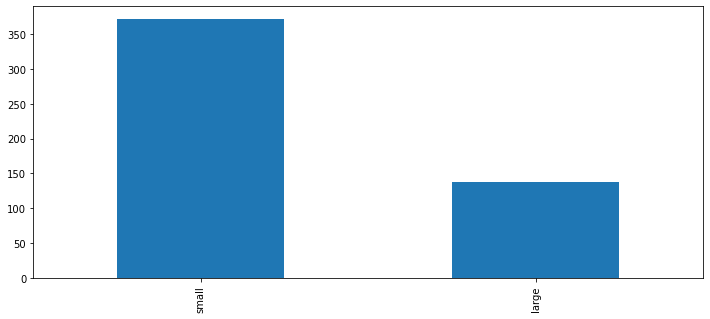

In [42]:
plt.figure(figsize=(12,5))
forest_1.size_category.value_counts().plot.bar()

<AxesSubplot:>

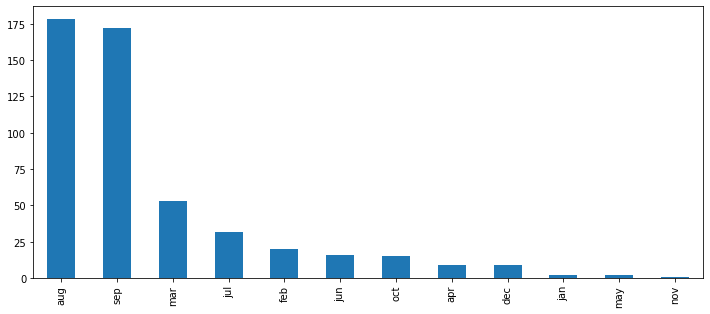

In [43]:
plt.figure(figsize=(12,5))
forest_1.month.value_counts().plot.bar()

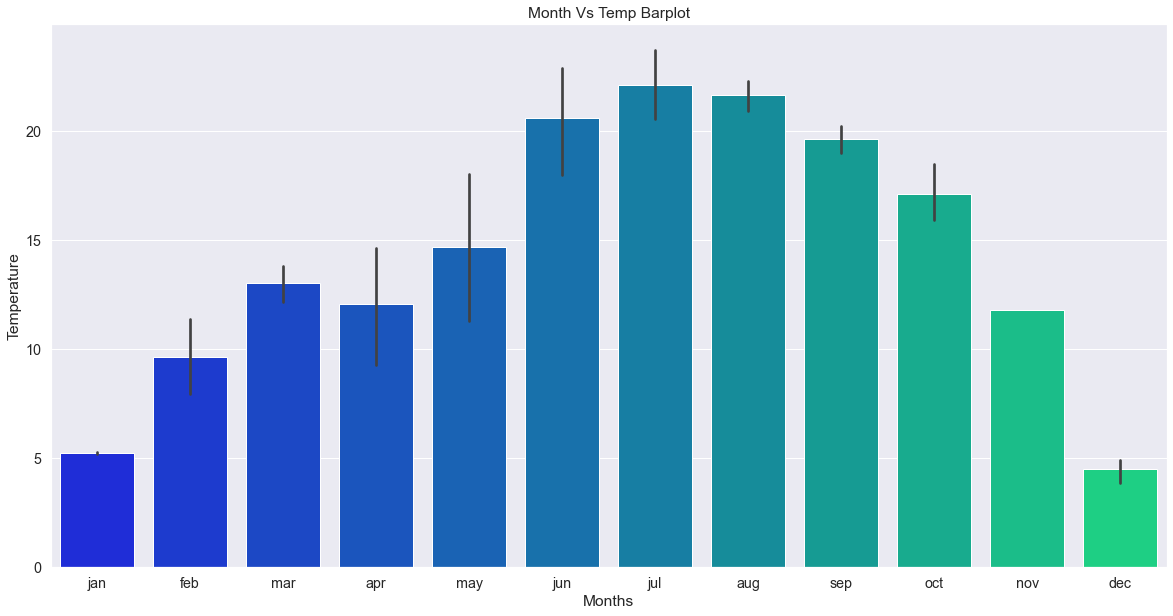

In [44]:
# Plotting Month Vs. temp plot
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = forest_1,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

In [45]:
# Pre-processing
forest_2= forest_1.iloc[:,2:30]
forest_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [46]:
scaler = StandardScaler()

In [47]:
forest_norm=scaler.fit_transform(forest_2)

In [48]:
pca=PCA(n_components=28)
pca_values=pca.fit_transform(forest_norm)
pca_values

array([[ 3.75397242e+00, -1.28931864e+00, -8.75381400e-01, ...,
        -6.46896939e-02,  2.81941939e-15,  8.77978229e-16],
       [ 3.80252163e-01,  7.93234886e-01, -1.13373932e+00, ...,
         3.38555037e-02, -1.21032282e-15,  6.26018308e-16],
       [ 6.61966478e-01,  1.14867222e+00, -1.19498731e+00, ...,
         2.75936820e-02, -4.43616508e-15,  3.10465664e-16],
       ...,
       [ 9.30557831e-01, -2.58780463e-01,  2.72948746e+00, ...,
        -3.01077280e-01, -1.61880522e-15,  4.60433431e-16],
       [-1.62707928e+00, -9.81426536e-01,  4.03873956e-01, ...,
         3.43662358e-02,  6.52256084e-17,  1.86884903e-16],
       [ 4.05704813e+00, -3.65854834e-01, -3.77790131e-01, ...,
        -2.51066990e-02, -1.10325077e-16,  2.51629622e-17]])

In [49]:
variance = pca.explained_variance_ratio_
variance

array([1.35679861e-01, 6.86304793e-02, 6.19524620e-02, 5.35834443e-02,
       4.74831741e-02, 4.68198775e-02, 4.36569624e-02, 4.28252784e-02,
       4.07424681e-02, 4.01999842e-02, 3.93456312e-02, 3.83337057e-02,
       3.64885130e-02, 3.62973143e-02, 3.57074619e-02, 3.49977780e-02,
       3.35241673e-02, 3.25086440e-02, 3.07199314e-02, 3.00762122e-02,
       2.34863017e-02, 2.08579572e-02, 1.18330651e-02, 8.92711776e-03,
       4.52514829e-03, 7.97059751e-04, 2.67581345e-32, 3.96119093e-33])

In [50]:
variance_1 = np.cumsum(np.round(variance,decimals = 4)*100)
variance_1

array([13.57, 20.43, 26.63, 31.99, 36.74, 41.42, 45.79, 50.07, 54.14,
       58.16, 62.09, 65.92, 69.57, 73.2 , 76.77, 80.27, 83.62, 86.87,
       89.94, 92.95, 95.3 , 97.39, 98.57, 99.46, 99.91, 99.99, 99.99,
       99.99])

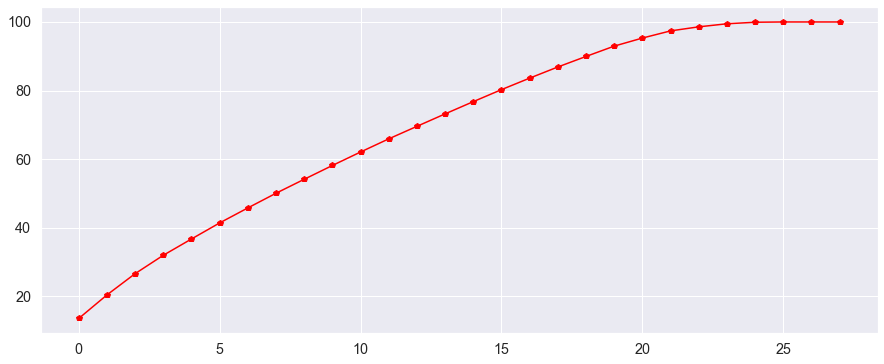

In [51]:
# Variance graph of PCA
plt.figure(figsize=(15,6))
plt.plot(variance_1,color='red',marker='p')

In [52]:
# slecting first 25 pca out of 28
final=pd.concat([pd.DataFrame(pca_values[:,:25]),forest_1[['size_category']]],axis=1)
final.size_category.replace(('large','small'),(1,0),inplace=True)

In [53]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,size_category
0,3.753972,-1.289319,-0.875381,-2.057203,-1.539565,0.525262,0.175580,-0.013656,-0.048815,-0.455360,0.412832,1.298344,-0.545239,-0.556329,-0.295589,-0.172690,-0.015770,0.617097,0.442868,-0.520640,-0.941988,-0.434493,-0.103097,-0.027117,-0.247662,0
1,0.380252,0.793235,-1.133739,1.511056,2.695340,1.307453,-2.701150,0.394590,-0.575579,0.159513,3.023977,-0.359222,-1.367010,1.816828,-0.899973,-2.497825,0.437228,0.679929,-1.027684,-1.359530,-0.898012,0.823984,0.221564,0.289076,0.097744,0
2,0.661966,1.148672,-1.194987,2.499254,0.939840,0.513138,-1.769094,-1.907318,-0.082289,0.292203,3.473222,-0.307193,-1.252620,1.778173,-0.959708,-2.539273,-0.721879,-0.296456,0.591026,-1.368595,-0.346942,0.725410,0.110888,0.355542,-0.384121,0
3,3.369783,-1.114478,0.348462,-2.201644,-2.081776,0.724578,-0.402971,-0.193619,-0.669534,-1.281672,-0.058304,1.025056,-0.716653,-0.239667,0.536274,-0.030154,0.034921,0.289695,0.770581,-1.821270,-0.860501,1.493872,-0.332142,-0.378250,1.142589,0
4,2.983335,-0.834919,1.337751,-0.041757,-1.087638,-0.795127,-0.832519,0.519465,0.697278,-1.994983,0.319614,1.162575,-0.071786,-0.596982,0.504038,0.816212,1.056955,-0.683917,0.431060,-1.927667,-0.697452,1.997097,-0.535772,0.177156,1.454403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-0.093232,0.113069,1.292821,1.506902,0.544380,-1.016410,-0.149738,0.849740,0.685424,-0.372472,1.039952,0.219833,0.300512,-0.247504,-0.768037,0.300026,0.541820,0.466450,0.339362,1.867316,-1.424191,-0.860211,-1.217031,-0.682027,0.092838,1
505,0.802495,-0.084618,2.688642,0.225348,0.390693,-0.831450,0.083194,0.178129,1.238868,-0.228236,0.769589,-0.056949,0.484614,-0.202784,-0.278037,0.350106,0.526695,0.539276,0.390010,0.008163,-0.917800,-1.368263,-1.281017,-1.193708,0.582727,1
506,0.930558,-0.258780,2.729487,-0.077863,0.423724,-0.888077,-0.023792,0.212013,1.190787,-0.246062,0.765835,-0.017635,0.221811,-0.198835,-0.466074,0.322612,0.376733,0.076586,0.353063,0.134062,-0.718433,-1.745729,-1.181496,-1.214221,0.491187,1
507,-1.627079,-0.981427,0.403874,1.211603,-0.527529,0.709734,0.634502,-1.490876,0.068663,-0.052213,0.543014,0.251698,0.243766,0.074894,-0.158461,0.001578,-1.045889,-0.810348,-0.075929,0.498942,0.052525,-0.066572,-0.057817,-0.309163,0.413763,0
